# Boston House Pricing Prediction

In [1]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn_genetic.callbacks import LogbookSaver
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Import the data and split it in train and test sets

In [2]:
data = load_boston()

y = data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Define the classifier to tune

In [3]:
clf = DecisionTreeRegressor()
pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])

### Create the CV strategy and define the param grid

In [4]:
cv = KFold(n_splits=5, shuffle=True)

param_grid = {
    "clf__ccp_alpha": Continuous(0, 1),
    "clf__criterion": Categorical(["mse", "mae"]),
    "clf__max_depth": Integer(2, 20),
    "clf__min_samples_split": Integer(2, 30)}

### Define the GASearchCV options

In [5]:
evolved_estimator = GASearchCV(
    estimator=pipe,
    cv=3,
    scoring="r2",
    population_size=15,
    generations=20,
    tournament_size=3,
    elitism=True,
    keep_top_k=4,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=param_grid,
    criteria="max",
    algorithm="eaMuCommaLambda",
    n_jobs=-1)

### Optionally, create some Callbacks

In [6]:
callbacks = [LogbookSaver(checkpoint_path="./logbook.pkl")]

### Fit the model and see some results

In [7]:
evolved_estimator.fit(X_train, y_train, callbacks=callbacks)
y_predict_ga = evolved_estimator.predict(X_test)
r_squared = r2_score(y_test, y_predict_ga)

  0%|          | 0/21 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	15    	0.623408	0.0772771  	0.696721   	0.494515   
1  	28    	0.675452	0.0429021  	0.70078    	0.520033   
2  	28    	0.692582	0.0105696  	0.704658   	0.675613   
3  	30    	0.698426	0.00457896 	0.706088   	0.687234   
4  	29    	0.701959	0.00221757 	0.707599   	0.697732   
5  	30    	0.703104	0.00308328 	0.706995   	0.698084   
6  	27    	0.705063	0.00111293 	0.706088   	0.702687   
7  	29    	0.703883	0.00113721 	0.706684   	0.701761   
8  	28    	0.704775	0.00149474 	0.706684   	0.701822   
9  	29    	0.706527	0.00275491 	0.712227   	0.701315   
10 	26    	0.704008	0.00180301 	0.707608   	0.700284   
11 	28    	0.703682	0.00194156 	0.706088   	0.700218   
12 	29    	0.704772	0.00187264 	0.709216   	0.701503   
13 	27    	0.704155	0.00144022 	0.706069   	0.701315   
14 	27    	0.703667	0.00132216 	0.706684   	0.702222   
15 	28    	0.706879	0.00414485 	0.713215   	0.701881   
16 	28    	0.703739	0.00175743 	0.706696   	0.69

In [8]:
print(evolved_estimator.best_params_)
print("r-squared: ", "{:.2f}".format(r_squared))
print("Best k solutions: ", evolved_estimator.hof)

{'clf__ccp_alpha': 0.1831227701471556, 'clf__criterion': 'mae', 'clf__max_depth': 5, 'clf__min_samples_split': 5}
r-squared:  0.70
Best k solutions:  {0: {'clf__ccp_alpha': 0.1831227701471556, 'clf__criterion': 'mae', 'clf__max_depth': 5, 'clf__min_samples_split': 5}, 1: {'clf__ccp_alpha': 0.1831227701471556, 'clf__criterion': 'mse', 'clf__max_depth': 5, 'clf__min_samples_split': 7}, 2: {'clf__ccp_alpha': 0.1831227701471556, 'clf__criterion': 'mse', 'clf__max_depth': 5, 'clf__min_samples_split': 2}, 3: {'clf__ccp_alpha': 0.1831227701471556, 'clf__criterion': 'mse', 'clf__max_depth': 5, 'clf__min_samples_split': 5}}


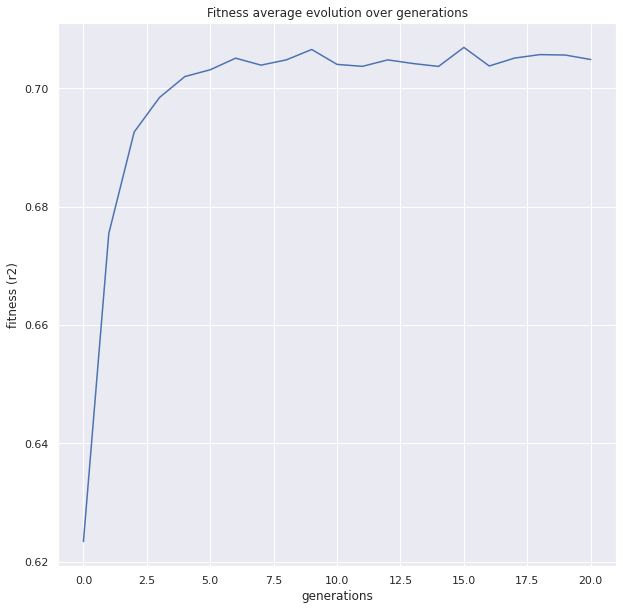

In [9]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

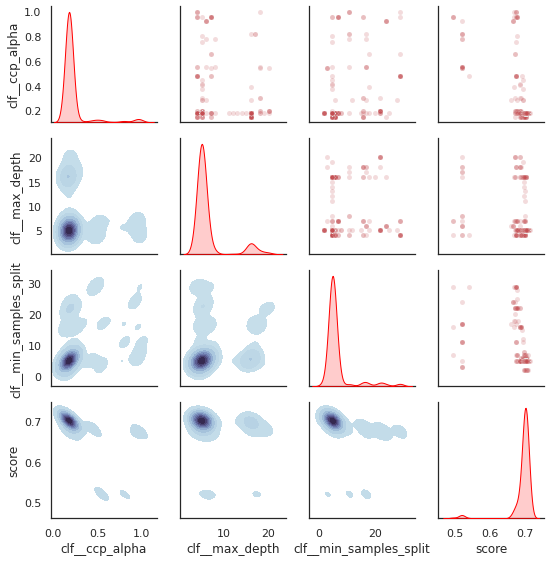

In [10]:
plot_search_space(evolved_estimator)
plt.show()